# Тест-кейс
1. Перед вами результаты участников эксперимента по мониторингу веса.
2. Посмотрите в каждом датасете первые 5 строк и последние 5 строк.
3. Посмотрите информацию о каждом датасете.
4. Проверьте датасеты на наличие дублей. Если дубли есть, то удалите их.
5. Переименуйте колонки в датасетах, чтобы они не содержали только строчные латинские буквы и символ "_".
6. Объедините датасеты по номеру участников
7. Посмотрите распределение по  полу и возрасту участников, постройте график распределений. Сделайте выводы об имеющейся выборке и напишите их в текстовом поле.
8. Посчитайте корреляцию между финальным весом и остальными параметрами датасета. Сделайте матрицу корреляции в виде графика. Ответьте на вопрос: какие факторы наиболее значимые для итогового веса?
9. Можете провести еще дополнительный анализ данных и сделать дополнительные выводы. Творческий подход приветствуется.

In [2]:
from typing import final

import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
from pyexpat import features

from IPython.core.pylabtools import figsize

%matplotlib inline

## Импорт и подготовка данных

In [3]:
experiments = pd.read_csv('experiments.csv')
participants = pd.read_csv('participants.csv', sep=';')

In [4]:
experiments.head()

,Participant ID,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


In [5]:
experiments.tail()

,Participant ID,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
95,96,181.9,2622.8,3656.2,1033.4,0.60000,2,Lightly Active,Excellent,3,182.5
96,97,116.5,1736.5,2756.5,1020.0,-8.92309,12,Moderately Active,Good,9,107.6
97,98,162.7,2188.6,3344.3,1155.8,3.60000,12,Lightly Active,Fair,7,166.3
98,99,179.8,2671.9,4000.0,1328.1,2.00000,5,Moderately Active,Fair,5,181.8
99,100,185.2,2830.7,4000.0,1169.3,2.70000,9,Very Active,Fair,7,187.9


In [6]:
participants.head()

,Participant ID,Age,Gender
0,1,56,M
1,2,46,F
2,3,32,F
3,4,25,F
4,5,38,M


In [7]:
participants.tail()

,Participant ID,Age,Gender
95,96,59,M
96,97,56,F
97,98,58,F
98,99,45,M
99,100,24,M


In [8]:
experiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant ID                 100 non-null    int64  
 1   Current Weight (lbs)           100 non-null    float64
 2   BMR (Calories)                 100 non-null    float64
 3   Daily Calories Consumed        100 non-null    float64
 4   Daily Caloric Surplus/Deficit  100 non-null    float64
 5   Weight Change (lbs)            100 non-null    float64
 6   Duration (weeks)               100 non-null    int64  
 7   Physical Activity Level        100 non-null    object 
 8   Sleep Quality                  100 non-null    object 
 9   Stress Level                   100 non-null    int64  
 10  Final Weight (lbs)             100 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 8.7+ KB


In [9]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Participant ID  100 non-null    int64 
 1   Age             100 non-null    int64 
 2   Gender          100 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [10]:
experiments = experiments.rename(str.lower, axis='columns')
experiments.columns = experiments.columns.str.replace('\s', '_', regex=True).str.replace('[^_\w]', '', regex=True)
experiments = experiments.rename(columns={'daily_caloric_surplusdeficit': 'daily_caloric_surplus_or_deficit'})
participants = participants.rename(str.lower, axis='columns')
participants.columns = participants.columns.str.replace('\s', '_', regex=True)

In [11]:
experiments.columns

Index(['participant_id', 'current_weight_lbs', 'bmr_calories',
       'daily_calories_consumed', 'daily_caloric_surplus_or_deficit',
       'weight_change_lbs', 'duration_weeks', 'physical_activity_level',
       'sleep_quality', 'stress_level', 'final_weight_lbs'],
      dtype='object')

In [12]:
participants.columns

Index(['participant_id', 'age', 'gender'], dtype='object')

In [13]:
experiments = experiments.drop_duplicates()
participants = participants.drop_duplicates()

In [14]:
print(experiments.nunique(), '\n')
print(participants.nunique())

participant_id                      100
current_weight_lbs                   94
bmr_calories                        100
daily_calories_consumed              67
daily_caloric_surplus_or_deficit    100
weight_change_lbs                    71
duration_weeks                       12
physical_activity_level               4
sleep_quality                         4
stress_level                          9
final_weight_lbs                     97
dtype: int64 

participant_id    100
age                40
gender              2
dtype: int64


In [15]:
full_data = experiments.merge(participants, on='participant_id')

In [16]:
full_data.head()

,participant_id,current_weight_lbs,bmr_calories,daily_calories_consumed,daily_caloric_surplus_or_deficit,weight_change_lbs,duration_weeks,physical_activity_level,sleep_quality,stress_level,final_weight_lbs,age,gender
0,1,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6,56,M
1,2,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8,46,F
2,3,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2,32,F
3,4,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3,25,F
4,5,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5,38,M


In [17]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    100 non-null    int64  
 1   current_weight_lbs                100 non-null    float64
 2   bmr_calories                      100 non-null    float64
 3   daily_calories_consumed           100 non-null    float64
 4   daily_caloric_surplus_or_deficit  100 non-null    float64
 5   weight_change_lbs                 100 non-null    float64
 6   duration_weeks                    100 non-null    int64  
 7   physical_activity_level           100 non-null    object 
 8   sleep_quality                     100 non-null    object 
 9   stress_level                      100 non-null    int64  
 10  final_weight_lbs                  100 non-null    float64
 11  age                               100 non-null    int64  
 12  gender   

In [18]:
full_data['physical_activity_level'].unique()

array(['Sedentary', 'Very Active', 'Lightly Active', 'Moderately Active'],
      dtype=object)

In [19]:
d = {'Sedentary': 0, 'Lightly Active': 1, 'Moderately Active': 2, 'Very Active': 3}
full_data['physical_activity_level'] = full_data['physical_activity_level'].map(d)

In [20]:
full_data['sleep_quality'].unique()

array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [21]:
d = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
full_data['sleep_quality'] = full_data['sleep_quality'].map(d)

In [22]:
d = {'M': 0, 'F': 1}
full_data['gender'] = full_data['gender'].map(d)

In [23]:
full_data = full_data.drop(['weight_change_lbs'], axis=1) # удаляем вычисляемый столбец

Я принял решения оставить столбец daily_caloric_surplus_or_deficit, хотя он и является вычисляемым, т.к. он может быть полезен в пункте с корреляцией.

In [24]:
new_dtypes = {'participant_id': 'int32',
              'current_weight_lbs': 'float32',
              'bmr_calories': 'float32',
              'daily_caloric_surplus_or_deficit': 'float32',
              'duration_weeks': 'int32',
              'physical_activity_level': 'int32',
              'sleep_quality': 'int32',
              'stress_level': 'int32',
              'final_weight_lbs': 'float32',
              'age': 'int32',
              'gender': 'int32'
              }
full_data = full_data.astype(new_dtypes)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    100 non-null    int32  
 1   current_weight_lbs                100 non-null    float32
 2   bmr_calories                      100 non-null    float32
 3   daily_calories_consumed           100 non-null    float64
 4   daily_caloric_surplus_or_deficit  100 non-null    float32
 5   duration_weeks                    100 non-null    int32  
 6   physical_activity_level           100 non-null    int32  
 7   sleep_quality                     100 non-null    int32  
 8   stress_level                      100 non-null    int32  
 9   final_weight_lbs                  100 non-null    float32
 10  age                               100 non-null    int32  
 11  gender                            100 non-null    int32  
dtypes: float3

После нехитрых манипуляций с фреймом удалось снизить затраты памяти на его хранение практически в 2 раза.

---
Однако есть минусы, если качество сна и физическая активность становятся ранговыми признаками, с которыми всё интуитивно понятно, то в случае пола нужно перед началом работы с фреймом уточнять, что мужчины это 0, а женщины 1.

## Анализ распределений полов по возрастам

In [25]:
full_data['gender'].value_counts()

gender
0    57
1    43
Name: count, dtype: int64

In [26]:
full_data['age'].value_counts().sort_values(ascending=False).head(10)

age
41    6
25    5
56    4
42    4
32    4
38    4
31    4
24    4
19    4
46    3
Name: count, dtype: int64

In [27]:
full_data.loc[full_data.gender == 0].age.describe()

count    57.000000
mean     37.561404
std      12.889666
min      18.000000
25%      25.000000
50%      38.000000
75%      48.000000
max      59.000000
Name: age, dtype: float64

In [28]:
full_data.loc[full_data.gender == 1].age.describe()

count    43.000000
mean     38.372093
std      11.403891
min      19.000000
25%      29.500000
50%      38.000000
75%      45.500000
max      58.000000
Name: age, dtype: float64

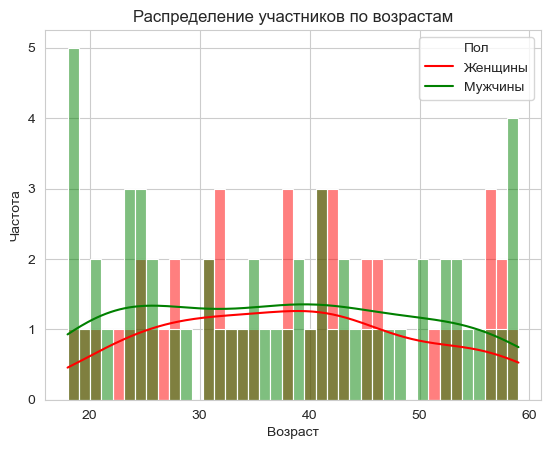

In [29]:
sns.histplot(data=full_data, x='age', hue='gender', palette=['green', 'red'], bins=40, kde=True)
plt.legend(title='Пол', labels=['Женщины', 'Мужчины'])
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение участников по возрастам')
plt.show()

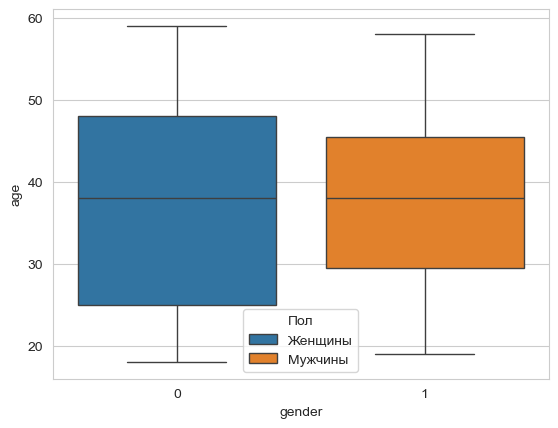

In [30]:
sns.boxplot(data=full_data, x='gender', y='age', hue='gender')
plt.legend(title='Пол', labels=['Женщины', 'Мужчины'])
plt.show()

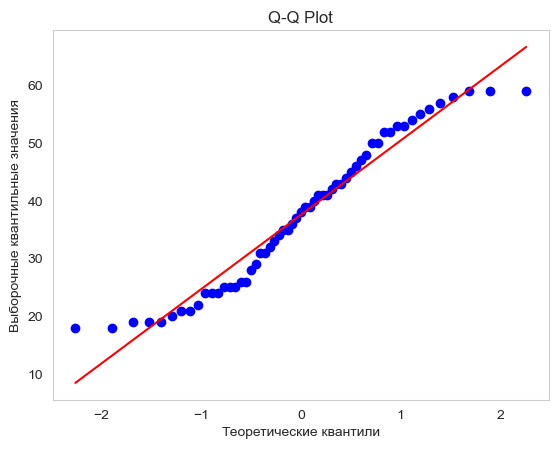

In [31]:
males_by_age = full_data[full_data['gender'] == 0]['age']
stats.probplot(males_by_age, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантильные значения')
plt.grid()
plt.show()

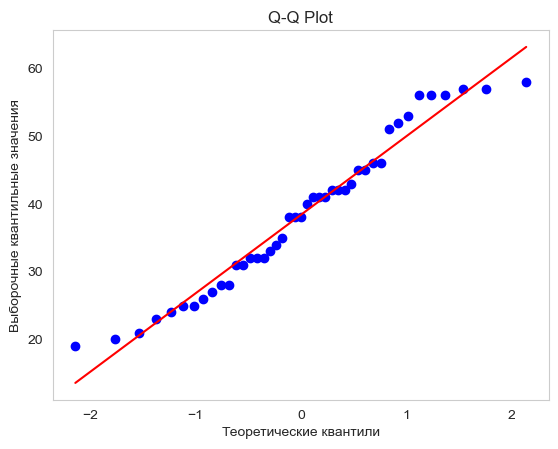

In [32]:
females_by_age = full_data[full_data['gender'] == 1]['age']
stats.probplot(females_by_age, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантильные значения')
plt.grid()
plt.show()

### Промежуточные выводы
Итак, из гистограммы распределения частот полов по возрастам видно, что распределение женщин напоминает нормальное, и не имеет слишком много выбросов, в отличие от распределения мужчин, где на краях распределения довольно сильные выбросы. 

На графиках q-q plot также сильные отклонения выборочных квантилей, от ожидаемых.

Однако же, поскольку выборки довольно малы, убедимся в выводах с помощью тестов.

In [33]:
def shapiro_wilk(data, name):
    stat, p = stats.shapiro(data)
    print(f'{name}:')
    print(f'Statistics: {stat}, p-value: {p}')
    
    alpha = 0.05
    if p > alpha:
        print(f'Принять гипотезу о нормальности')
    else:
        print(f'Отклонить гипотезу о нормальности')
        

def pirson(data, name):
    stat, p = stats.normaltest(data) # Критерий согласия Пирсона
    print(f'{name}:')
    print(f'Statistics: {stat}, p-value: {p}')
    
    alpha = 0.05
    if p > alpha:
        print('Принять гипотезу о нормальности')
    else:
        print('Отклонить гипотезу о нормальности')

In [34]:
print('Тест Шапиро-Уилка')
shapiro_wilk(males_by_age, 'Мужчины')
shapiro_wilk(females_by_age, 'Женщины')

print('\nКритерий согласия Пирсона')
pirson(males_by_age, 'Мужчины')
pirson(females_by_age, 'Женщины')

Тест Шапиро-Уилка
Мужчины:
Statistics: 0.9428084151710435, p-value: 0.009400636439038115
Отклонить гипотезу о нормальности
Женщины:
Statistics: 0.9554886759979104, p-value: 0.09471105001434152
Принять гипотезу о нормальности

Критерий согласия Пирсона
Мужчины:
Statistics: 15.957740811257398, p-value: 0.00034262623266850556
Отклонить гипотезу о нормальности
Женщины:
Statistics: 4.627296000587646, p-value: 0.09889980616208911
Принять гипотезу о нормальности


### Промежуточные выводы 2: 
* оба теста показали одинаковый результат - распределение мужчин по возрастам в генеральной совокупности отличается от нормального;
* хотя p-value для распределения женщин в обоих тестах позволяет принять гипотезу о нормальности распределения в генеральной совокупности, все же он довольно близок к критическому значению;
* описательные статистики обеих выборок довольно близки друг к другу.
 
В связи с тем, что распределение мужчин не может быть принято за нормальное, использовать нужно непараметрические тесты для сравнения выборок.

In [35]:
stat, p = stats.mannwhitneyu(males_by_age, females_by_age)
print('Тест Манна-Уитни')
print(f'Statistics: {stat}, p-value: {p}')

if p > 0.05:
    print('Нет значимых различий в выборках')
else:
    print('Имеются значимые различия в выборках')

Тест Манна-Уитни
Statistics: 1172.0, p-value: 0.7119766196195048
Нет значимых различий в выборках


In [36]:
stat, p = stats.ks_2samp(males_by_age, females_by_age)
print('Тест Колмогорова-Смирнова')
print(f'Statistics: {stat}, p-value: {p}')
if p > 0.05:
    print('Нет значимой разницы между распределениями')
else:
    print('Есть значимая разница между распределениями')

Тест Колмогорова-Смирнова
Statistics: 0.11219910240718074, p-value: 0.8736662346552767
Нет значимой разницы между распределениями


In [57]:
stat, p_value = stats.levene(males_by_age, females_by_age, center='median')
print('Тест Левина')
print(f'Statistics: {stat}, p-value: {p}')
if p_value > 0.05:
    print("Нет статистически значимой разницы в дисперсиях.")
else:
    print("Есть статистически значимая разница в дисперсиях.")

Тест Левина
Statistics: 1.4471918231193537, p-value: 0.8736662346552767
Нет статистически значимой разницы в дисперсиях.


In [38]:
def std_diff(group1, group2):
    return np.std(group1) - np.std(group2)
print('Тест перестановками')
_res = stats.permutation_test((males_by_age, females_by_age), std_diff, n_resamples=10000)
stat = _res.statistic
p_value = _res.pvalue
print(f'Statistic: {stat}, p-value: {p_value}')
if p_value > 0.05:
    print("Нет статистически значимой разницы в дисперсиях.")
else:
    print("Есть статистически значимая разница в дисперсиях.")

Тест перестановками
Statistic: 1.5055908019650293, p-value: 0.2161783821617838
Нет статистически значимой разницы в дисперсиях.


И для полной уверенности проверим тестом Андерсона-Дарлинга, чтобы придать большее значение хвостам распределений, где у мужчин как раз наблюдаются сильные выбросы

In [39]:
result = stats.anderson_ksamp([males_by_age, females_by_age], method=stats.PermutationMethod())
print(f'Statistic: {result.statistic}, p-value: {result.pvalue}')

Statistic: -0.49790150393959803, p-value: 0.6123


Вновь p-value >> 0.05

---

### Вывод - значимых различий в распределениях мужчин и женщин по возрастам нет

В связи с этим, в дальнейших рассуждениях и работе с данными можно не учитывать различия полов (там где это не предполагается)

## Анализ зависимости итогового веса от остальных признаков

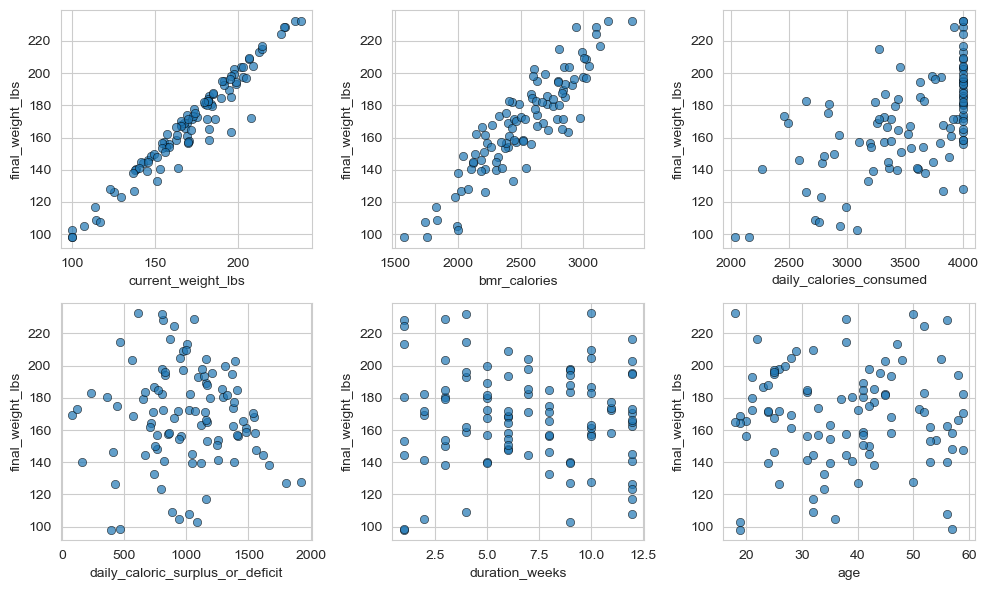

In [40]:
numeric_features = full_data.\
                    drop(['participant_id', 
                          'final_weight_lbs',
                          'physical_activity_level',
                          'sleep_quality',
                          'stress_level',
                          'gender'
                          ], axis=1).columns
target = full_data['final_weight_lbs']
plt.figure(figsize=(10, 6))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=full_data[feature], y=target, alpha=0.7, edgecolor='k')

plt.tight_layout()
plt.show()

На графиках представлены зависимости итогового веса от других количественных признаков. Прямая положительная зависимость итогового веса от изначального более чем очевидна, поэтому нет смысла считать корреляцию между двумя этими признаками. Судя по всему, имеет место довольно сильная положительная зависимость итогового веса от BMR. Также стоит посмотреть на степень коррелированности с остальными представленными признаками, кроме возраста, т.к. с ним никакой связи не прослеживается.


In [44]:
full_data.\
    drop(['participant_id', 
          'physical_activity_level',
          'sleep_quality',
          'stress_level',
          'gender',
          'current_weight_lbs',
          'age'
          ], axis=1).\
    corr()[['final_weight_lbs']]

,final_weight_lbs
bmr_calories,0.895571
daily_calories_consumed,0.591838
daily_caloric_surplus_or_deficit,-0.060773
duration_weeks,-0.053311
final_weight_lbs,1.000000


Также посмотрим на матрицу корреляции всех признаков.

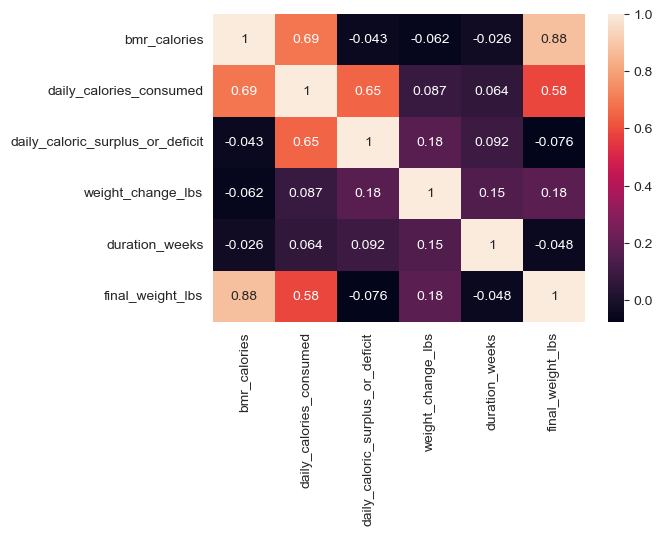

In [56]:
corr_matrix = experiments.drop(['participant_id',
                                'physical_activity_level',
                                'sleep_quality',
                                'stress_level',
                                'current_weight_lbs'], axis=1).corr(method='spearman')
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [58]:
def anova(df, category):
    groups = [df.loc[df[category] == x, 'Value'] for x in df[category].unique()]
    h_stat, p_value = stats.kruskal(*groups)
    print(f"H-Statistic: {h_stat}, p-value: {p_value}")